### Assignment 07

**You can use the local Jupyter environment if you are not comfortable with Colab for this assignment.**

The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

You will unzip the zip file manually in preparation for this assignment.

The link to the zip file is (you have already used it in your assignment 5):

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data" 

The folder contains the yearly data files from 1996 to 2019 school years.

if you are using your local environment, I suggest you create a new folder call "Assignment7" and place the Notebook file and the data folder under it.
```
Assignment7/
    - assignment_07.ipynb
    - CollegeScorecard_Raw_Data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'
```


In [1]:
# <1> 
# Import libraries

#(Write code here)
import pandas as pd
import os

In [2]:
# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

#(Write code here)
print(os.name)
os.getcwd()

nt


'C:\\Users\\baris\\Downloads'

In [3]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

#(Write code here)
file_list = os.listdir('C:/Users/baris/Desktop/DATA 690/CollegeScorecard_Raw_Data/CollegeScorecard_Raw_Data')
file_list

['.DS_Store',
 'Crosswalks.zip',
 'data.yaml',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [4]:
len(file_list)

28

In [5]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.
new_list = []
#(Write code here)
for element in file_list:
    if "MERGED" in element:
        new_list.append(element)  

new_list

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [6]:
len(new_list)

23

In [7]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.
df_list = []
path = "C:/Users/baris/Desktop/DATA 690/CollegeScorecard_Raw_Data/CollegeScorecard_Raw_Data/"
#(Write code here)
for element in new_list: 
    df = pd.read_csv(path+str(element), usecols=["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
    year = str(element)[6:10]
    df['year'] = year
    df_list.append(df)


In [8]:
# new single dataframe
a = pd.DataFrame()
a = a.append(df_list)
a

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996
...,...,...,...,...,...,...,...
6801,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
6804,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018


In [9]:
df_list[5]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
0,100636,Community College of the Air Force,AL,0,NaN,NaN,2001
1,100654,Alabama A & M University,AL,5,0.7505,4664.0,2001
2,100663,University of Alabama at Birmingham,AL,5,0.9098,3640.0,2001
3,100690,Amridge University,AL,5,NaN,NaN,2001
4,100706,University of Alabama in Huntsville,AL,5,0.8381,3536.0,2001
...,...,...,...,...,...,...,...
6720,440855,Milan Institute-Amarillo,TX,6,1.0000,NaN,2001
6721,440864,Trinity College,CA,8,1.0000,NaN,2001
6722,440873,Vatterott College-Dividend,TN,5,0.9091,7520.0,2001
6723,440882,Vatterott College-Tulsa,OK,6,0.9106,6715.0,2001


In [10]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

#(Write code here)
print(a.shape)
print(a.get("UNITID"))

(163331, 7)
0         100636
1         100654
2         100663
3         100672
4         100690
          ...   
6801    48511112
6802    48511113
6803    48616901
6804    49005401
6805    49146401
Name: UNITID, Length: 163331, dtype: int64


In [11]:
a.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996


In [12]:
a.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
6801,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
6804,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018
6805,49146401,ABC Adult School - Cabrillo Lane,CA,8.0,NaN,NaN,2018


In [13]:
a.sample()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
3652,213303,Keystone College,PA,2.0,0.9254,14370.0,2004


In [14]:
# getting the missing values
print(a.isnull())
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      a.isnull().sum())

      UNITID  INSTNM  STABBR  REGION  ADM_RATE  TUITIONFEE_IN   year
0      False   False   False   False      True           True  False
1      False   False   False   False      True           True  False
2      False   False   False   False      True           True  False
3      False   False   False   False      True           True  False
4      False   False   False   False      True           True  False
...      ...     ...     ...     ...       ...            ...    ...
6801   False   False   False   False      True          False  False
6802   False   False   False   False      True          False  False
6803   False   False   False   False      True           True  False
6804   False   False   False   False      True          False  False
6805   False   False   False   False      True           True  False

[163331 rows x 7 columns]
 
Count total NaN at each column in a DataFrame : 

 UNITID                0
INSTNM                0
STABBR                0
REGION              

In [15]:
# getting statistics
a.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,1.633310e+05,163330.000000,44911.000000,79194.000000
mean,9.432395e+05,4.554693,0.692946,11665.505367
std,4.571721e+06,2.189217,0.217062,9985.998016
min,1.006360e+05,0.000000,0.000000,0.000000
25%,1.633380e+05,3.000000,0.555000,3776.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000
75%,4.075680e+05,6.000000,0.857100,16146.000000
max,4.914640e+07,9.000000,1.000000,74787.000000


In [16]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.
umbc_data = pd.DataFrame()
#(Write code here)
umbc_data = a[a["INSTNM"] == "University of Maryland-Baltimore County"]
umbc_data

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


In [17]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

#(Write code here)
print(umbc_data.shape)
print(umbc_data.get("STABBR"), umbc_data.get("ADM_RATE"))
# print(umbc_data["STABBR"]) easier way for the line above


(23, 7)
2151    MD
2049    MD
1982    MD
1955    MD
1926    MD
1915    MD
1893    MD
1873    MD
1830    MD
1819    MD
1799    MD
1779    MD
1767    MD
1745    MD
1710    MD
1694    MD
1660    MD
1629    MD
1610    MD
1555    MD
1510    MD
1478    MD
1415    MD
Name: STABBR, dtype: object 2151       NaN
2049       NaN
1982       NaN
1955       NaN
1926       NaN
1915    0.6551
1893    0.6327
1873    0.5757
1830    0.7014
1819    0.7143
1799    0.7153
1779    0.6895
1767    0.7174
1745    0.6890
1710    0.6589
1694    0.6081
1660    0.6035
1629    0.6315
1610    0.5961
1555    0.5942
1510    0.5683
1478    0.6021
1415    0.5794
Name: ADM_RATE, dtype: float64


In [18]:
umbc_data.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [19]:
umbc_data.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1555,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
1510,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
1478,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
1415,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


In [20]:
umbc_data.sample()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
1745,163268,University of Maryland-Baltimore County,MD,2.0,0.689,8872.0,2009


In [21]:
# getting missing data
print(umbc_data.isnull())
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      umbc_data.isnull().sum())

      UNITID  INSTNM  STABBR  REGION  ADM_RATE  TUITIONFEE_IN   year
2151   False   False   False   False      True           True  False
2049   False   False   False   False      True           True  False
1982   False   False   False   False      True           True  False
1955   False   False   False   False      True           True  False
1926   False   False   False   False      True          False  False
1915   False   False   False   False     False          False  False
1893   False   False   False   False     False          False  False
1873   False   False   False   False     False          False  False
1830   False   False   False   False     False          False  False
1819   False   False   False   False     False          False  False
1799   False   False   False   False     False          False  False
1779   False   False   False   False     False          False  False
1767   False   False   False   False     False          False  False
1745   False   False   False   Fal

In [22]:
# getting statistics for umbc
umbc_data.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,23.0,23.0,18.000000,19.000000
mean,163268.0,2.0,0.640694,9004.842105
std,0.0,0.0,0.052728,1825.795421
min,163268.0,2.0,0.568300,5490.000000
25%,163268.0,2.0,0.597600,8270.000000
50%,163268.0,2.0,0.632100,8872.000000
75%,163268.0,2.0,0.689375,10226.000000
max,163268.0,2.0,0.717400,11778.000000


Tuition fee is not available before 2000


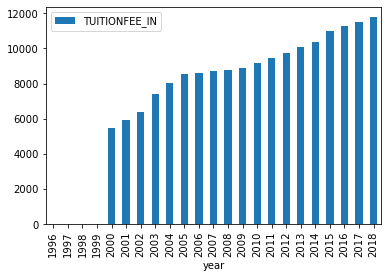

In [23]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart
import matplotlib.pyplot as plt
#(Write code here)
ax = umbc_data.plot.bar(x='year', y='TUITIONFEE_IN')
print("Tuition fee is not available before 2000")

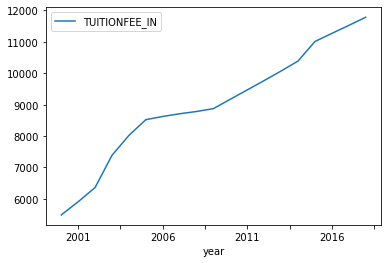

In [24]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

#(Write code here)
ax = umbc_data.plot.line(x='year', y='TUITIONFEE_IN')

In [25]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List
umbc_fee = []
#(Write code here)

# umbc_data["TUITIONFEE_IN"] << is a series
for element in umbc_data["TUITIONFEE_IN"]:
    umbc_fee.append(element)

umbc_fee


[nan,
 nan,
 nan,
 nan,
 5490.0,
 5910.0,
 6362.0,
 7388.0,
 8020.0,
 8520.0,
 8622.0,
 8708.0,
 8780.0,
 8872.0,
 9171.0,
 9467.0,
 9764.0,
 10068.0,
 10384.0,
 11006.0,
 11264.0,
 11518.0,
 11778.0]

In [26]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one

 #(Write code here)
# using pandas series built in function
umbc_fee_series = pd.Series(umbc_fee)
print("All values show percentage change")
umbc_fee_series.pct_change()*100

All values show percentage change


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5      7.650273
6      7.648054
7     16.127004
8      8.554413
9      6.234414
10     1.197183
11     0.997448
12     0.826826
13     1.047836
14     3.370153
15     3.227565
16     3.137213
17     3.113478
18     3.138657
19     5.989985
20     2.344176
21     2.254972
22     2.257336
dtype: float64

In [27]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity
pct_change_two_decimal = []
## to add this data to the dataframe in the next step, I created a new list and put the two decimal values in this list.
#(Write code here)
for element in umbc_fee_series.pct_change()*100:
    element = float(round(element, 2)) # round function, which takes as its first argument the number and the second argument is the precision after the decimal point.
    pct_change_two_decimal.append(element)
    
pct_change_two_decimal


[nan,
 nan,
 nan,
 nan,
 nan,
 7.65,
 7.65,
 16.13,
 8.55,
 6.23,
 1.2,
 1.0,
 0.83,
 1.05,
 3.37,
 3.23,
 3.14,
 3.11,
 3.14,
 5.99,
 2.34,
 2.25,
 2.26]

In [28]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

#(Write code here)
umbc_data["PCT_CHANGE"] = pct_change_two_decimal
umbc_data

<ipython-input-28-1e891ec52989>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umbc_data["PCT_CHANGE"] = pct_change_two_decimal


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year,PCT_CHANGE
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,7.65
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,7.65
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,16.13
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,8.55
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,6.23


Tuition fee is not available before 2000


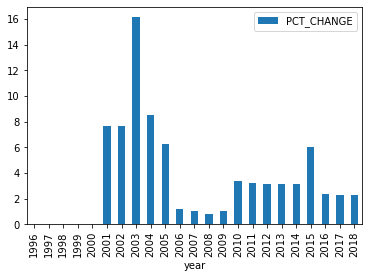

In [29]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

# (write code here)
ax = umbc_data.plot.bar(x='year', y='PCT_CHANGE')
print("Tuition fee is not available before 2000")


Tuition fee is not available before 2000


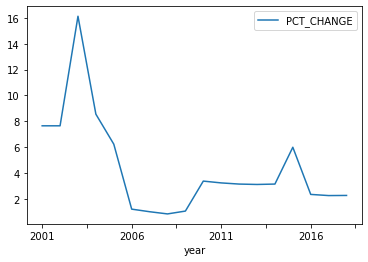

In [30]:
ax = umbc_data.plot.line(x='year', y='PCT_CHANGE')
print("Tuition fee is not available before 2000")


In [31]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

#(Write code here)

#(Write code here)
def tuition_fee_increase(university_name):
    # print(university_name) # check point control
    university_name_data = pd.DataFrame() # creating a new dataframe
    university_name_data = a[a["INSTNM"] == university_name] # getting desired universities data
    university_name_fee = []
    # print(university_name_data) # check point control
    for element in university_name_data["TUITIONFEE_IN"]: #creating list of tuitions
        university_name_fee.append(element)
    university_name_series = pd.Series(university_name_fee) # creating series to show tuition change
    # print("All values show percentage change") # check point control
    return university_name_series.pct_change()*100
    
tuition_fee_increase(input("Put a university name: "))

Put a university name: University of Maryland-Baltimore County


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5      7.650273
6      7.648054
7     16.127004
8      8.554413
9      6.234414
10     1.197183
11     0.997448
12     0.826826
13     1.047836
14     3.370153
15     3.227565
16     3.137213
17     3.113478
18     3.138657
19     5.989985
20     2.344176
21     2.254972
22     2.257336
dtype: float64

In [32]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.
jhu_data = pd.DataFrame()
#(Write code here)
jhu_data = a[a["INSTNM"] == "Johns Hopkins University"]
jhu_data


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005


In [33]:
tuition_fee_increase("Johns Hopkins University")


0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5     5.134376
6     4.502098
7     4.892296
8     4.907762
9     4.910418
10    7.210626
11    5.899705
12    5.013928
13    3.846154
14    3.908046
15    3.933137
16    2.625355
17    4.793731
18    3.496811
19    3.506162
20    3.490043
21    3.491371
22    3.009392
dtype: float64

Tuition fee is not available before 2000


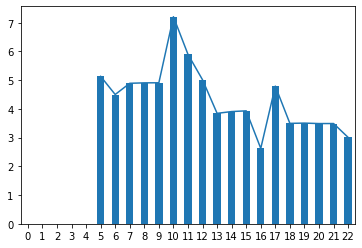

In [34]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

#(Write code here)

ax = tuition_fee_increase("Johns Hopkins University").plot.bar(x='year', y='PCT_CHANGE'), tuition_fee_increase("Johns Hopkins University").plot.line(x='year', y='PCT_CHANGE')
print("Tuition fee is not available before 2000")

In [35]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

#(Write code here)
tuition_fee_increase("Johns Hopkins University")



0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5     5.134376
6     4.502098
7     4.892296
8     4.907762
9     4.910418
10    7.210626
11    5.899705
12    5.013928
13    3.846154
14    3.908046
15    3.933137
16    2.625355
17    4.793731
18    3.496811
19    3.506162
20    3.490043
21    3.491371
22    3.009392
dtype: float64

In [36]:
# creating another function to change the elements of series to a list. With that we are able to add those data as another
# column in our data frame.

def two_decimal_list(university_name):
    fee_change_two_decimal = []
    for element in tuition_fee_increase(university_name):
        element = float(round(element, 2)) # round function, which takes as its first argument the number and the second argument is the precision after the decimal point.
        fee_change_two_decimal.append(element)
    return fee_change_two_decimal
two_decimal_list(input("University name: "))


University name: University of Maryland-Baltimore County


[nan,
 nan,
 nan,
 nan,
 nan,
 7.65,
 7.65,
 16.13,
 8.55,
 6.23,
 1.2,
 1.0,
 0.83,
 1.05,
 3.37,
 3.23,
 3.14,
 3.11,
 3.14,
 5.99,
 2.34,
 2.25,
 2.26]

In [37]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

#(Write code here)

        
jhu_data["PCT_CHANGE"] = two_decimal_list("Johns Hopkins University")
jhu_data



<ipython-input-37-9d1ed873b92f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jhu_data["PCT_CHANGE"] = two_decimal_list("Johns Hopkins University")


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year,PCT_CHANGE
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996,NaN
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997,NaN
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998,NaN
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999,NaN
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000,NaN
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001,5.13
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002,4.50
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003,4.89
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004,4.91
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005,4.91


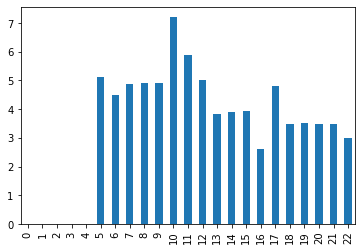

In [38]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

#(Write code here)
ax = tuition_fee_increase("Johns Hopkins University").plot.bar(x='year', y='PCT_CHANGE')

In [39]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.
umbc2 = pd.DataFrame()
#(Write code here)
umbc2["UMBC_PCT"] = umbc_data["PCT_CHANGE"]
umbc2["YEAR"] = umbc_data["year"]
umbc2



,UMBC_PCT,YEAR
2151,NaN,1996
2049,NaN,1997
1982,NaN,1998
1955,NaN,1999
1926,NaN,2000
1915,7.65,2001
1893,7.65,2002
1873,16.13,2003
1830,8.55,2004
1819,6.23,2005


In [40]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge
jhu2 = pd.DataFrame()
#(Write code here)
jhu2["JHU_PCT"] = jhu_data["PCT_CHANGE"]
jhu2["YEAR"] = jhu_data["year"]
jhu2


,JHU_PCT,YEAR
2139,NaN,1996
2039,NaN,1997
1973,NaN,1998
1946,NaN,1999
1917,NaN,2000
1906,5.13,2001
1884,4.50,2002
1865,4.89,2003
1823,4.91,2004
1812,4.91,2005


In [41]:
# Now, merger the two data frames
# and display the new dataframe

#(Write code here)
new_data_frame = pd.merge(umbc2, jhu2, on='YEAR')
new_data_frame = new_data_frame[['YEAR', 'UMBC_PCT', 'JHU_PCT']]
new_data_frame

,YEAR,UMBC_PCT,JHU_PCT
0,1996,NaN,NaN
1,1997,NaN,NaN
2,1998,NaN,NaN
3,1999,NaN,NaN
4,2000,NaN,NaN
5,2001,7.65,5.13
6,2002,7.65,4.50
7,2003,16.13,4.89
8,2004,8.55,4.91
9,2005,6.23,4.91


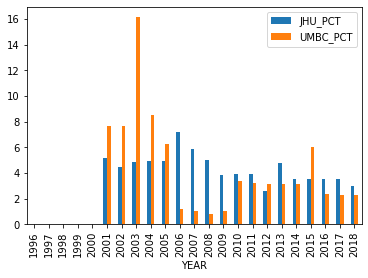

In [42]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

#(Write code here)
ax = new_data_frame.plot.bar(x='YEAR', y=['JHU_PCT', 'UMBC_PCT'])


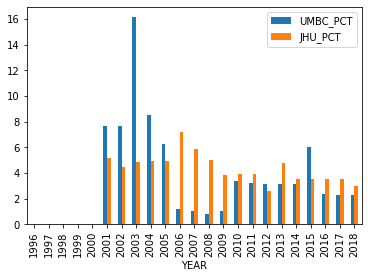

In [43]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

#(Write code here)
ax = new_data_frame.plot.bar(x='YEAR', y=["UMBC_PCT","JHU_PCT"])


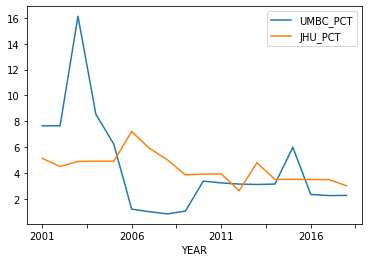

In [44]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

#(Write code here)
ax = new_data_frame.plot.line(x='YEAR', y=["UMBC_PCT","JHU_PCT"])



In [45]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

#### Based on my observation of the plots:
UMBC had a higher rate of increase on its tuition fees in early 2000s. In 2006 it dropped down dramatically to around 1% and went up again in 2010 to almost 4%. In the last couple of year it got steady around little over 2%. Meanwhile JHU had around 5% of increase on tuition rates. Over the years there are slight changes up and down but it got steady in the last couple of years around 3%.

In [46]:
# The end.